# 커널 서포트 벡터 머신(SVM; kernelized support vector machines)
입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것


## 선형 모델과 비선형 특성
직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적임. 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것

Text(0,0.5,'feature 1')

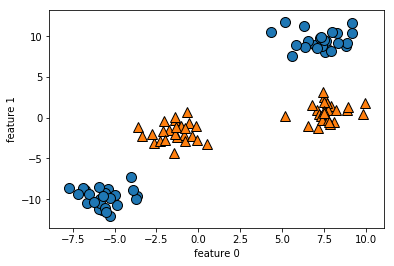

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn
X, y = make_blobs(centers = 4, random_state = 8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel('feature 1')

Text(0,0.5,'feature 1')

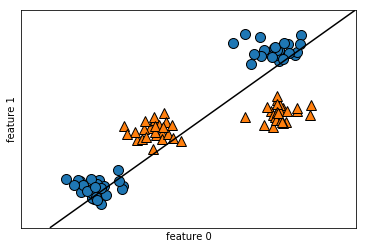

In [4]:
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어맞지 않음

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5,0,'feature1 ** 2')

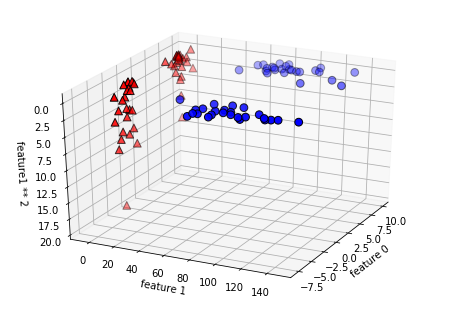

In [6]:
# 두 번째 특성을 제곱한 특성 1 ** 2를 새로운 특성으로 추가해 입력 특성을 확장  -  (특성0, 특성1, 특성1**2)의 3차원 데이터 포인트로 표현
import numpy as np
X_new = np.hstack([X, X[:, 1:] **2 ])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y==0 포인트를 먼저 그리고 y==1 포인트를 그림
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 ** 2')

Text(0.5,0,'feature1 ** 2')

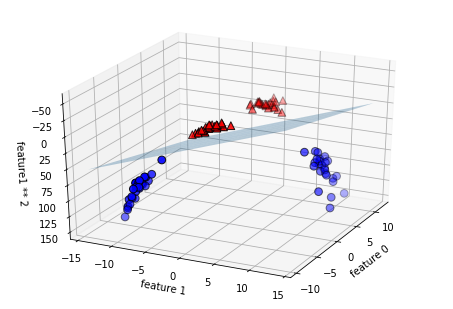

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY +intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0],X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature1 ** 2')

' 원래 두 개 특성에 반영한 결정 경계 -> 더 이상 직선이 아니라 타원에 가까움'

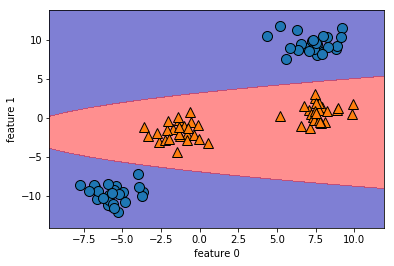

In [9]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha = 0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

''' 원래 두 개 특성에 반영한 결정 경계 -> 더 이상 직선이 아니라 타원에 가까움'''

## 커널 기법 kernel trick
#### 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기를 학습시킴. 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)을 계산

SVM에서 데이터를 고차원 공간에 매핑하는 방법
1. 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산
2. RBF 커널(Radial Basis Function; 가우시안 커널) : 모든 차수의 모든 다항식을 고려



## SVM 이해하기
학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 됨. 일반적으로 훈련 데이터의 일부만 결정 경게를 만드는 데 영향을 줌 
#### 두 클래스 사이의 경계에 위치한 데이터 포인트들. 이것들을 서포트 벡터(Support Vector)라고 함

Text(0,0.5,'feature 1')

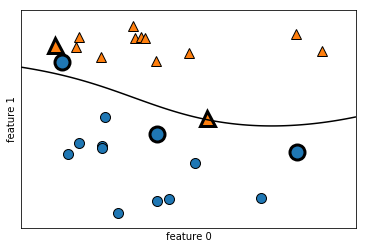

In [10]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma = 0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

SVM은 비선형 경계를 만들었고, 굵은 테두리로 표시된 데이터 포인트들이 Support Vector임

## SVM 매개변수 튜닝
gamma 매개변수는 가우시안 커널 폭의 역수에 해당함 - 이 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정함.
작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적임.

즉 가우시간 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

C 매개변수는 규제 매개변수임. 이 매개변수는 각 포인트의 중요도 (정확히는 dual_coef_값)를 제한함

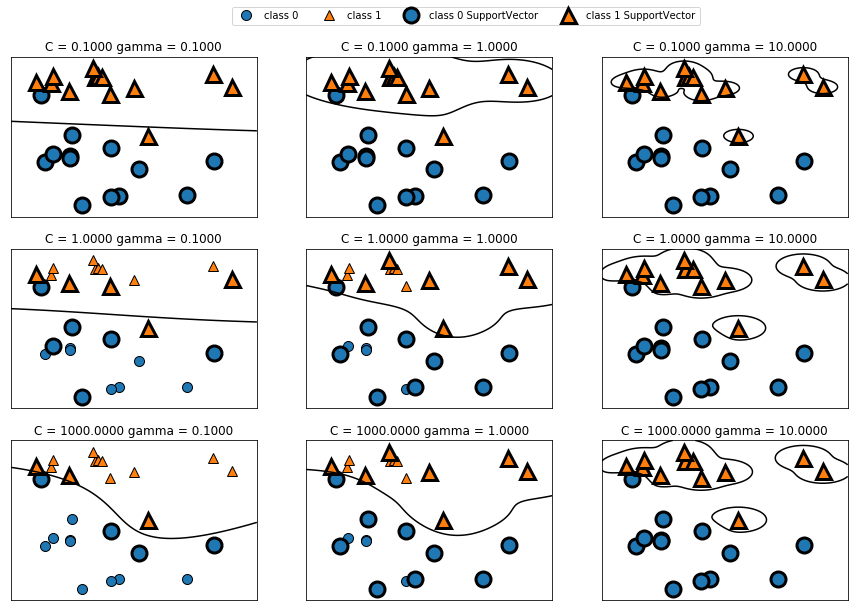

In [12]:
fig, axes = plt.subplots(3,3, figsize = (15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0,0].legend(['class 0', 'class 1', 'class 0 SupportVector', 'class 1 SupportVector'], ncol=4, loc=(.9, 1.2))

작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춤. 반면에 큰 gamma 값은 더 복잡한 모델을 만듦.

작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작음. 왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않음. 왼쪽 아래에서 볼 수 있듯이 C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계가 휘어서 정확하게 분류하게 함.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.2f}'.format(svc.score(X_test, y_test)))


훈련 세트 정확도 : 1.00
테스트 세트 정확도 : 0.63


과대적합되어있음. 

SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감함. 특히 입력 특성의 범위가 비슷해야 함.

Text(0,0.5,'feature size')

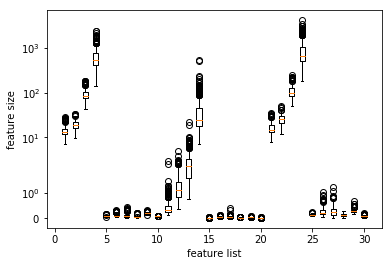

In [24]:
# 각 특성의 최솟값과 최댓값을 로그 스케일로 나타냄

plt.boxplot(X_train, manage_xticks=False)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature size')

## SVM을 위한 데이터 전처리
특성 값의 범위가 비슷해지도록 조정 - 커널 SVM에서는 모든 특성 값을 0과 1사이로 맞추는 방법을 많이 사용
#### MinMaxScaler 전처리 메서드를 사용

In [25]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
#훈련 세트에서 특성별 (최댓값-최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

'''훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0, 최댓값은 1임'''
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최소 값 \n{}'.format(X_train_scaled.min(axis=0)))
print('특성별 최대 값 \n{}'.format(X_train_scaled.max(axis=0)))

특성별 최소 값 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [28]:
'''테스트 세트에서도 같은 작업을 적용하지만 훈련 세트에서 계산한 최솟값과 범위를 사용함'''

X_test_scaled = (X_test - min_on_training) / range_on_training

In [31]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.948
테스트 세트 정확도 : 0.951


훈련, 테스트 세트 정확도가 매우 비슷해서 과소적합된 상태임. 여기서 C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음


In [32]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.972


## 장단점과 매개변수
### 장점 
- 다양한 데이터셋에서 잘 작동함, 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음
- 저차원과 고차원의 데이터(즉, 특성이 적을 때와 많을 때 모두)

### 단점
- 샘플이 많을 때는 잘 맞지 않음
- 데이터 전처리와 매개변수 설정에 신경을 많이 써야함
- 분석 및 비전문가에게 설명이 어려움

### 중요 매개변수
- 규제 매개변수 C
- 어떤 커널을 사용할지와 각 커널에 따른 매개변수